# Plotting computational cost

## Import libraries

In [3]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os

## Define cell cycle model

In [46]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 6

# input_folder = "Live/"
# input_folder = "Ki67_Basic/"
# input_folder = "Ki67_Advanced/"
# input_folder = "Flow_Cytometry/"
input_folder = "Separated_Flow_Cytometry/"

## Define experimental settings

In [47]:
num_files = 9
num_params = 3

settings = np.zeros((num_files, num_params))
settings[0,:] = np.array([0.1, 37, 10])
settings[1,:] = np.array([0.1, 37, 50])
settings[2,:] = np.array([0.1, 100, 10])
settings[3,:] = np.array([0.1, 200, 20])
settings[4,:] = np.array([6, 37, 10])
settings[5,:] = np.array([6, 37, 50])
settings[6,:] = np.array([6, 100, 10])
settings[7,:] = np.array([6, 100, 20])
settings[8,:] = np.array([6, 200, 10])

## Read *.csv* files

In [48]:
def get_filename(settings):
    if settings[0].is_integer():
        return "dt" + str(int(settings[0])) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"
    
    return "dt" + str(settings[0]) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"

In [49]:
data = [None] * num_files
total_cost = [None] * num_files
mean_total_cost = [None] * num_files
phenotype_update_cost = [None] * num_files
mean_phenotype_update_cost = [None] * num_files

for i in range(num_files):
    data[i] = np.genfromtxt(input_folder + get_filename(settings[i,:]), dtype = float, delimiter = ',', names = True)
    total_cost[i] = data[i]["total_cost"]
    mean_total_cost[i] = total_cost[i]/settings[i,2]
    phenotype_update_cost[i] = data[i]["phenotype_update_cost"]
    mean_phenotype_update_cost[i] = phenotype_update_cost[i]/settings[i,2]

## Plot computational cost

In [50]:
def get_label(settings):
    return "dt=" + str(settings[0]) + ", NC=" + str(int(settings[1])) + ", R=" + str(int(settings[2]))

<Figure size 432x288 with 0 Axes>

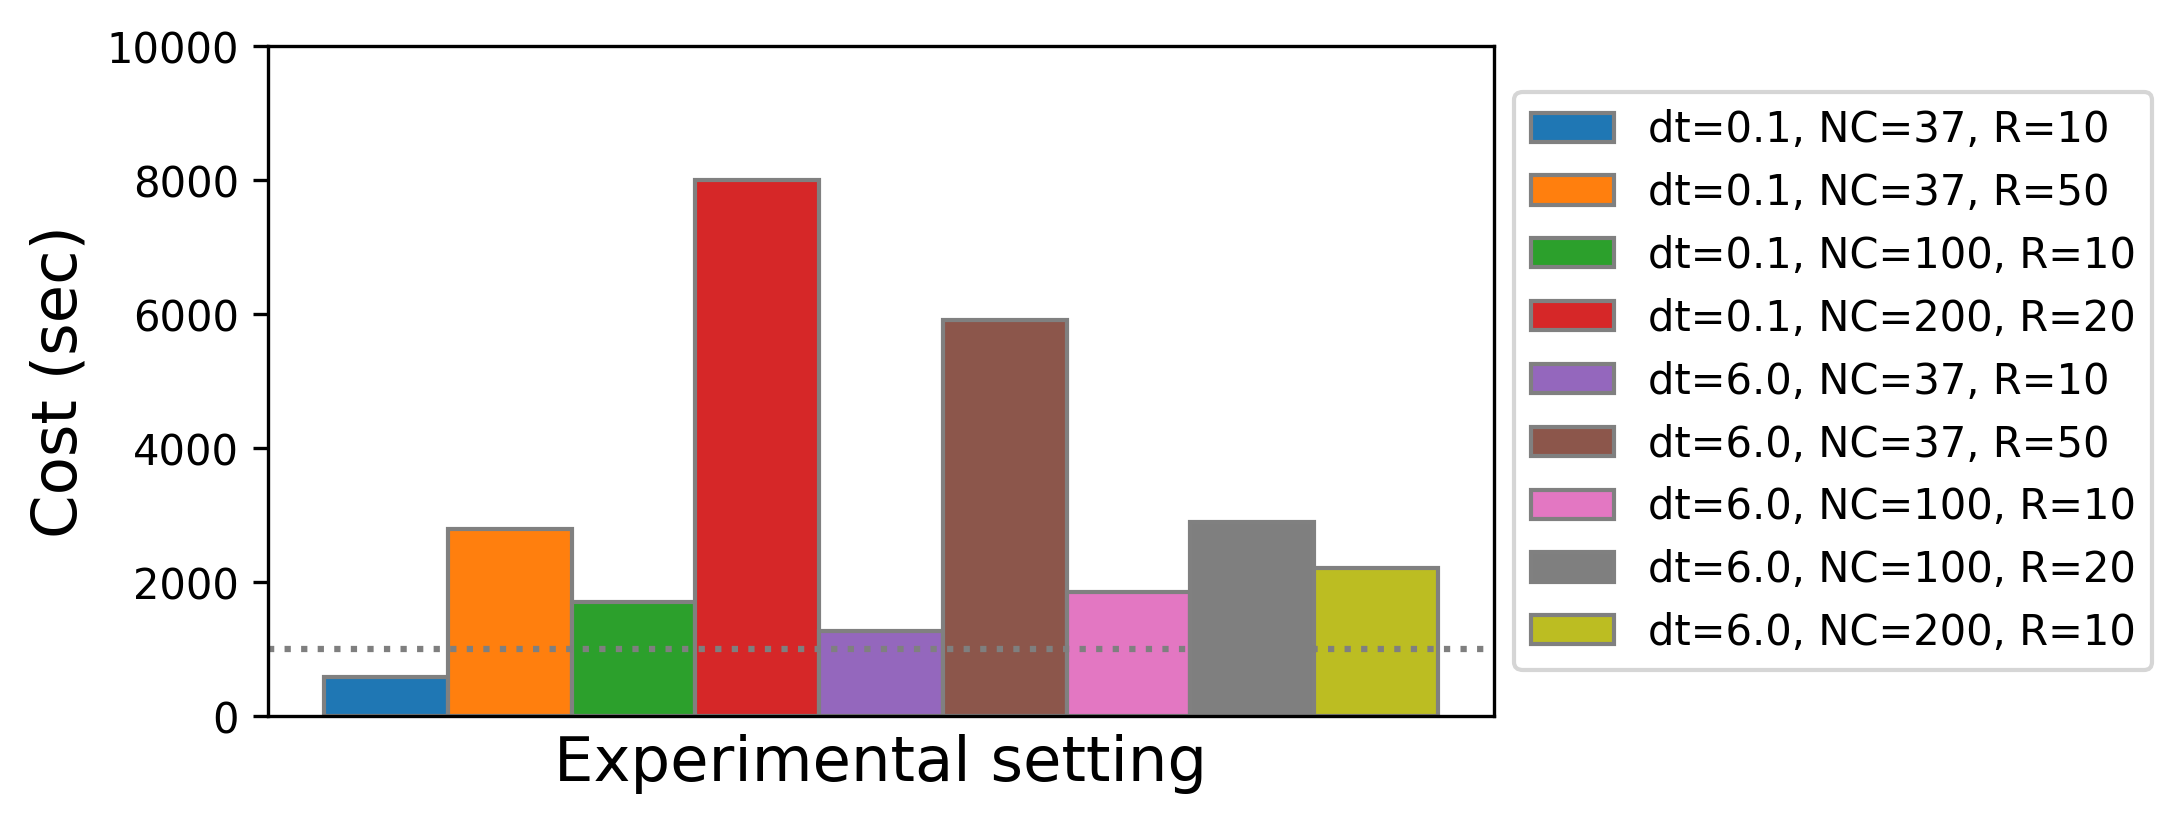

In [80]:
bar_width = 0.1
ticks_factor = 3
threshold = 1000.0

bar_pos = [None] * num_files
bar_pos[0] = np.arange(total_cost[0].size)
for i in range(1, num_files):
    bar_pos[i] = [x + bar_width for x in bar_pos[i-1]]
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], total_cost[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks([], [])
if cycle_model == 0:
    plt.ylim((0.0, 4000.0))
elif cycle_model == 1:
    plt.ylim((0.0, 3500.0))
elif cycle_model == 2:
    plt.ylim((0.0, 3500.0))
elif cycle_model == 5:
    plt.ylim((0.0, 5000.0))
elif cycle_model == 6:
    plt.ylim((0.0, 10000.0))
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Computational cost comparison', size=20)
plt.xlabel( 'Experimental setting', size=15 ) 
plt.ylabel( 'Cost (sec)', size=15 )
plt.savefig(os.path.join(input_folder, "cost_bar.pdf"), bbox_inches = 'tight')

## Plot mean computational cost

<Figure size 432x288 with 0 Axes>

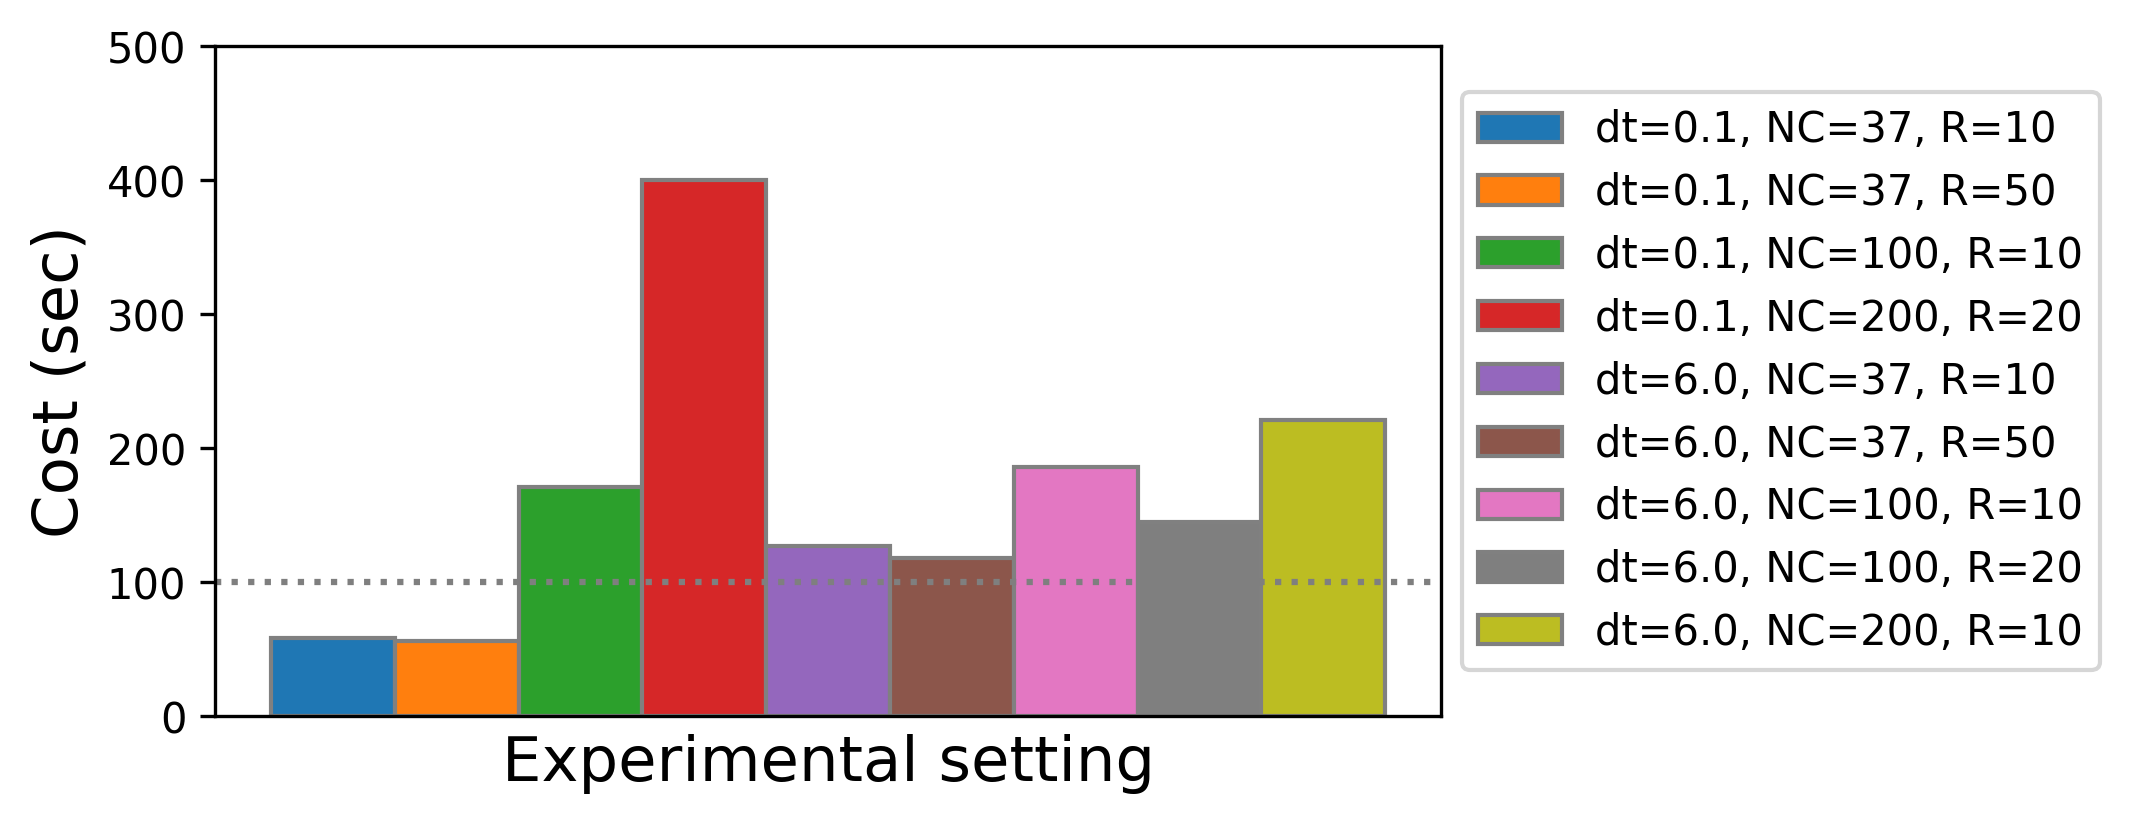

In [81]:
threshold = 100.0
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], mean_total_cost[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks([], [])
if cycle_model == 0:
    plt.ylim((0.0, 200.0))
elif cycle_model == 1:
    plt.ylim((0.0, 180.0))
elif cycle_model == 2:
    plt.ylim((0.0, 160.0))
elif cycle_model == 5:
    plt.ylim((0.0, 200.0))
elif cycle_model == 6:
    plt.ylim((0.0, 500.0))
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Mean computational cost comparison', size=20)
plt.xlabel( 'Experimental setting', size=15 ) 
plt.ylabel( 'Cost (sec)', size=15 )
plt.savefig(os.path.join(input_folder, "mean_cost_bar.pdf"), bbox_inches = 'tight')

## Plot computational cost by number of phenotype updates

<Figure size 432x288 with 0 Axes>

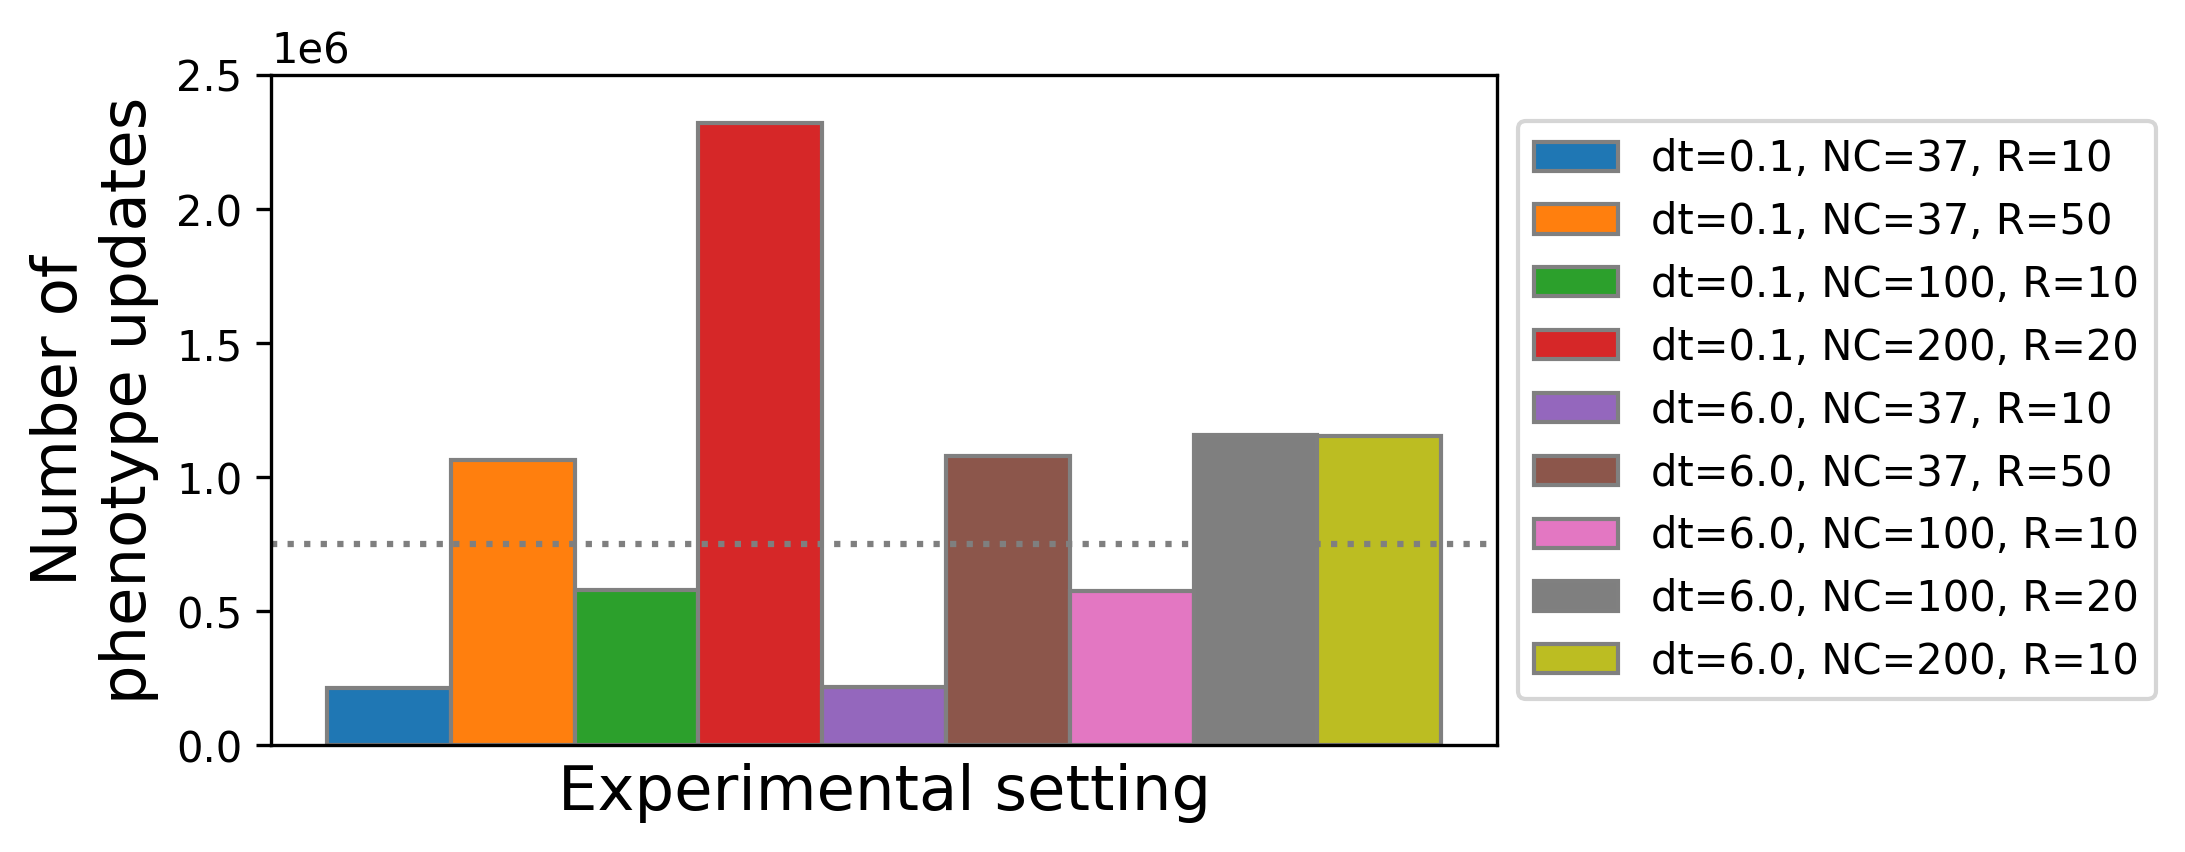

In [83]:
threshold = 0.75e6
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], phenotype_update_cost[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks([], [])
if cycle_model == 0:
    plt.ylim((0.0, 3.0e6))
elif cycle_model == 1:
    plt.ylim((0.0, 2.5e6))
elif cycle_model == 2:
    plt.ylim((0.0, 2.5e6))
elif cycle_model == 5:
    plt.ylim((0.0, 2.5e6))
elif cycle_model == 6:
    plt.ylim((0.0, 2.5e6))
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Computational cost comparison', size=20, x=0.5, y=1.05)
plt.xlabel( 'Experimental setting', size=15 ) 
plt.ylabel( 'Number of \n phenotype updates', size=15 )
plt.savefig(os.path.join(input_folder, "phenotype_update_cost_bar.pdf"), bbox_inches = 'tight')

## Plot mean computational cost by number of phenotype updates

<Figure size 432x288 with 0 Axes>

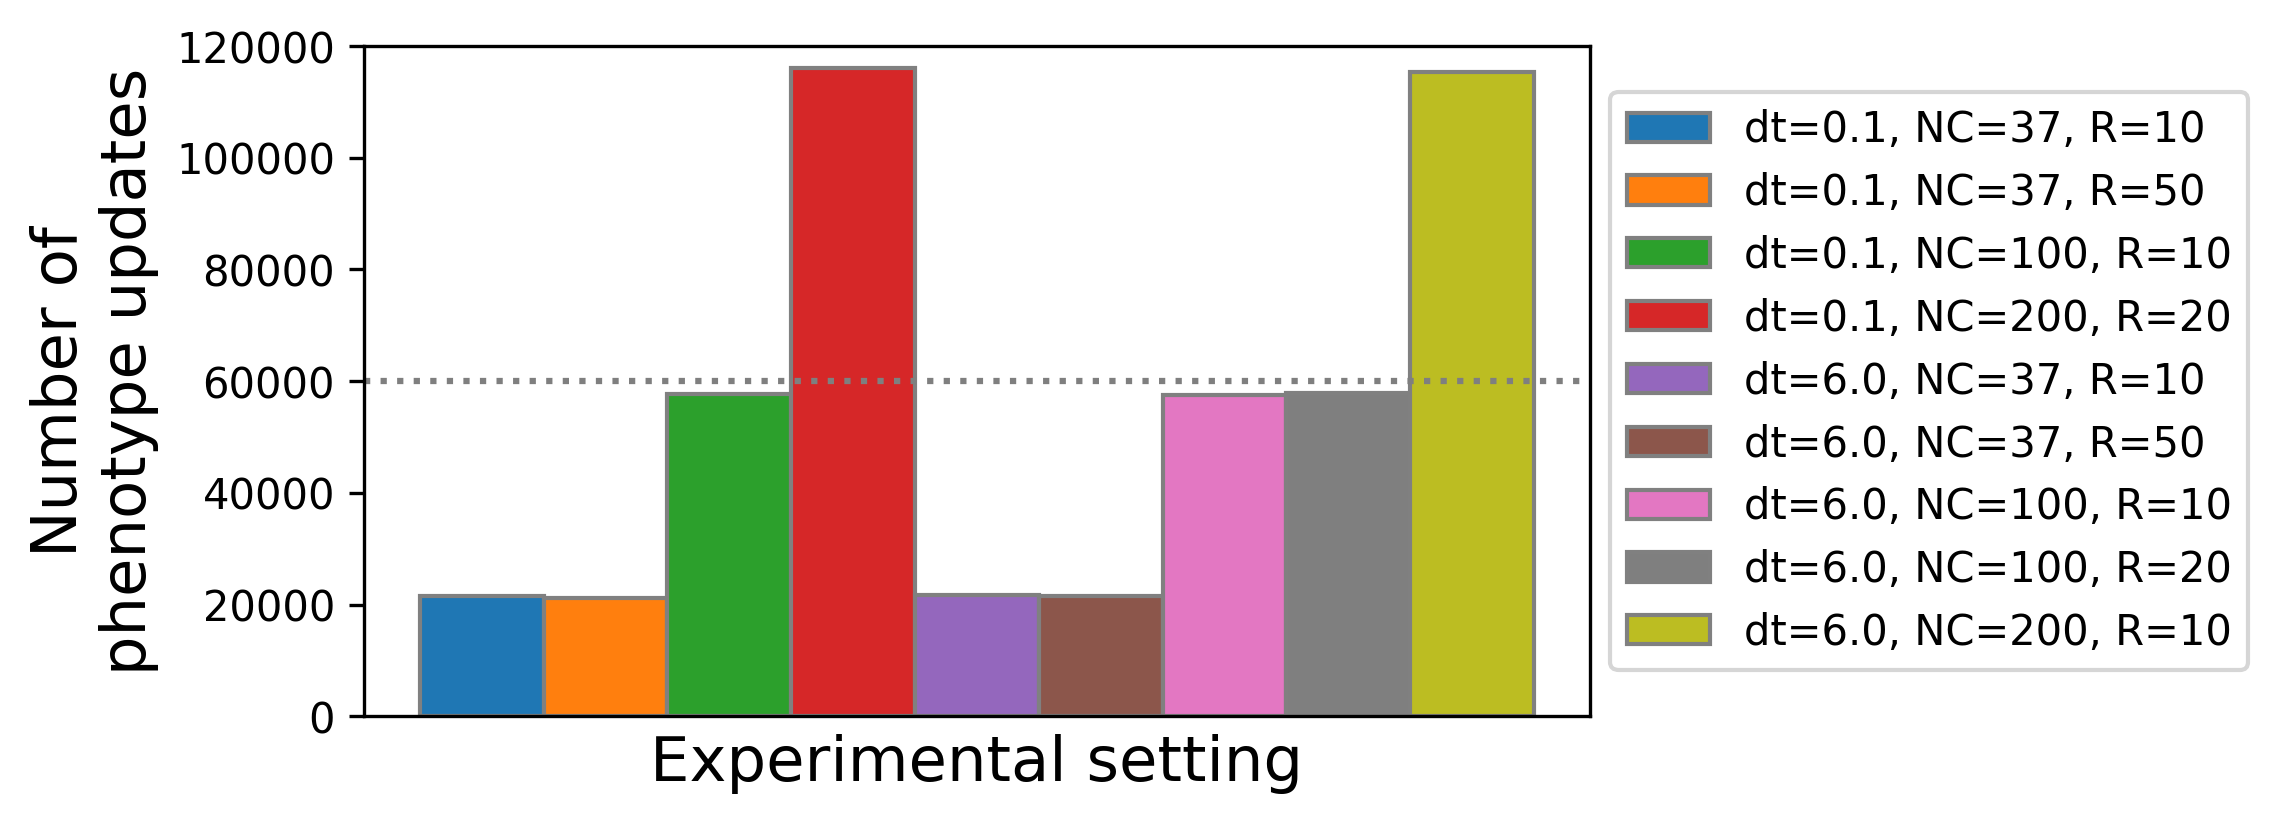

In [85]:
threshold = 60000.0
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], mean_phenotype_update_cost[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks([], [])
if cycle_model == 0:
    plt.ylim((0.0, 140000.0))
elif cycle_model == 1:
    plt.ylim((0.0, 120000.0))
elif cycle_model == 2:
    plt.ylim((0.0, 120000.0))
elif cycle_model == 5:
    plt.ylim((0.0, 120000.0))
elif cycle_model == 6:
    plt.ylim((0.0, 120000.0))
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Mean computational cost comparison', size=20, x=0.5, y=1.05)
plt.xlabel( 'Experimental setting', size=15 ) 
plt.ylabel( 'Number of \n phenotype updates', size=15 )
plt.savefig(os.path.join(input_folder, "mean_phenotype_update_cost_bar.pdf"), bbox_inches = 'tight')